# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt
pf

<module 'pyfeng' from 'C:\\Users\\harvey\\anaconda3\\lib\\site-packages\\pyfeng\\__init__.py'>

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
forward = 100
sigma = 0.2
texp = 1
vov = 0.5
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
#sabr_bsm.__dict__

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([0.20400581, 0.20266888, 0.20161986, 0.20085527, 0.2003692 ,
        0.20015312, 0.20019595, 0.20048427, 0.20100266, 0.20173418,
        0.20266088, 0.20376432, 0.20502604, 0.20642803, 0.20795302,
        0.20958477, 0.2113082 , 0.21310949, 0.21497615, 0.21689693,
        0.2188618 , 0.22086191, 0.22288945, 0.22493758, 0.22700034]))

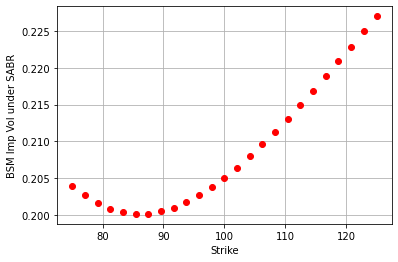

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

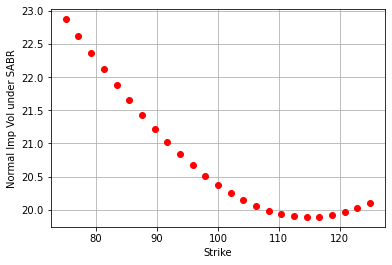

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [10]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([13.60780137,  8.16505218,  4.76869334]),
 array([0.20057006, 0.20502604, 0.21274362]))

In [11]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': 0.25,
 'beta': 1}

In [12]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.2000000000001008,
 'vov': 0.4999999998672808,
 'rho': 0.24999999998258432}

In [13]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

{'sigma': 0.19999999979636335,
 'vov': 0.5000000129299839,
 'rho': 0.2499999894054446}

## 2. Pricing under MC method

In [14]:
strike = np.linspace(75,125,num=25)
forward = 100

In [15]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [16]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([25.68267909, 23.81980646, 22.01139088, 20.26749308, 18.59330925,
        16.99620675, 15.48386975, 14.0598131 , 12.7243097 , 11.4835773 ,
        10.34141338,  9.29879884,  8.35290765,  7.48808627,  6.70537121,
         5.99987316,  5.36640271,  4.79829087,  4.29002251,  3.8366473 ,
         3.43344845,  3.07417706,  2.75380412,  2.46436655,  2.20625275]))

Repeat the same for beta = 0

In [17]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [18]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 array([26.4391131 , 24.61268372, 22.82605389, 21.08166103, 19.38436204,
        17.74168266, 16.1551532 , 14.6302875 , 13.17152556, 11.78608904,
        10.48731456,  9.27482925,  8.15403675,  7.12294482,  6.18269778,
         5.33043716,  4.56760958,  3.89297604,  3.2958566 ,  2.77427195,
         2.32064462,  1.92983349,  1.59846441,  1.32113339,  1.08627086]))

## 3. Pricing under conditional MC method

In [19]:
strike = np.linspace(75,125,num=25)
forward = 100

In [20]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [21]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([25.61961498, 23.73987895, 21.91287475, 20.14745813, 18.45242579,
        16.83606523, 15.30569745, 13.86726747, 12.52503276, 11.28138483,
        10.13681665,  9.09002665,  8.13813188,  7.27695294,  6.5013318 ,
         5.80544852,  5.18311146,  4.62800525,  4.13388976,  3.69474953,
         3.30489817,  2.95904406,  2.65232505,  2.38031918,  2.13903817]))

Repeat the same for beta = 0

In [22]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [23]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 array([26.57917777, 24.7395514 , 22.93673432, 21.17557281, 19.46129216,
        17.79944218, 16.19581287, 14.65631652, 13.1868344 , 11.79302957,
        10.48013133,  9.25270173,  8.11439986,  7.06776373,  6.11403189,
         5.25302625,  4.48311296,  3.80125021,  3.20312183,  2.68334442,
         2.23572725,  1.85355845,  1.52989052,  1.25780139,  1.03061353]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [24]:
times = 100
MC_price = np.zeros((times,len(strike)))
CMC_price = np.zeros((times,len(strike)))
for i in range(times):
    MC_price[i,:] = sabr_bsm_mc.price(strike, forward, texp, random=True)
    CMC_price[i,:] = sabr_norm_cmc.price(strike, forward, texp, random=True)
    
print("MC method mean:" , MC_price.mean(axis=0))
print("MC method std:" ,MC_price.std(axis=0))
print("CMC method mean:" , CMC_price.mean(axis=0))
print("CMC method std:",CMC_price.std(axis=0))

MC method mean: [25.60376458 23.72907004 21.90911481 20.15199516 18.46545864 16.85674053
 15.33232382 13.89720455 12.55516107 11.30862041 10.15725411  9.09977705
  8.13395208  7.25656616  6.46345753  5.74945839  5.10972791  4.53771206
  4.02739315  3.57361235  3.17101166  2.8144257   2.49864412  2.21956207
  1.97336861]
MC method std: [0.22292019 0.21985248 0.21631958 0.21237996 0.20827361 0.20327873
 0.19758771 0.19158604 0.18514719 0.17836192 0.17122673 0.16345914
 0.15553589 0.14748488 0.13988146 0.13259843 0.12580408 0.11939876
 0.11350792 0.10783333 0.10233216 0.09706044 0.09199385 0.0868328
 0.08184622]
CMC method mean: [26.56682914 24.72844026 22.92696559 21.16724572 19.45449584 17.7942506
 16.1922792  14.65446718 13.18666312 11.79449209 10.4831414   9.25712932
  8.12007258  7.0744719   6.12153765  5.26107596  4.49145181  3.80963716
  3.21134292  2.69122274  2.24312846  1.86039173  1.53610546  1.26338196
  1.03557064]
CMC method std: [0.03354032 0.03170092 0.02977302 0.02777158 

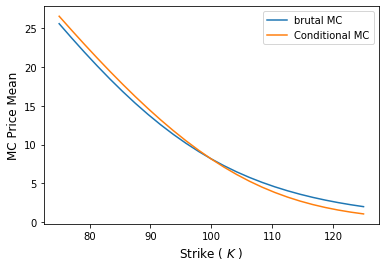

In [25]:
mean_arr = np.array([MC_price.mean(axis=0), CMC_price.mean(axis=0)])
labels = ['brutal MC', 'Conditional MC']

for j in np.arange(len(mean_arr)):
    plt.plot(strike, mean_arr[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=12)
plt.ylabel('MC Price Mean', fontsize=12)
plt.legend()

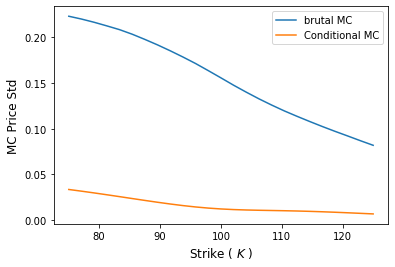

In [26]:
std_arr = np.array([MC_price.std(axis=0), CMC_price.std(axis=0)])
labels = ['brutal MC', 'Conditional MC']

for j in np.arange(len(std_arr)):
    plt.plot(strike, std_arr[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=12)
plt.ylabel('MC Price Std', fontsize=12)
plt.legend()